In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

import json
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
#import wikipedia
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from pandas.plotting import register_matplotlib_converters
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from joblib import dump,load

In [2]:
from dataframes import df1, df2, df3, df4, df5

C:\Users\DOLPHIN\practical-workshops-Nafis-dead\group-project-group-95-master\group-project-group-95-master\dataframes.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Country"][x] = dataset["Country"][x][:-1]


In [3]:
rd = pd.read_csv("raw_datasets/Covid.csv")
pd.to_datetime(rd["dateRep"])
rd = rd[::-1]
rd.set_index("dateRep")


,day,month,year,cases,deaths,countriesAndTerritories,geoId,Code,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
3/21/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
3/22/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
3/23/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
3/24/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
3/25/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9/28/2020,28,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.343261
9/29/2020,29,9,2020,12,3,Afghanistan,AF,AFG,38041757.0,Asia,1.114565
9/30/2020,30,9,2020,15,2,Afghanistan,AF,AFG,38041757.0,Asia,1.048847


In [4]:
df3

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Codes
Code,,,,,,,,,,,,,,,,,,,,,
ABW,3998,27,48934.248896,Aruba,LATIN AMER. & CARIB,71891,193,3725,589.0,28000.0,...,1053.0,0.0,8947.0,2.0,1103.0,668.0,4.0,333.0,663.0,ABW
AFG,39285,1458,1441.242580,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,480,16307.0,700.0,...,1213.0,22.0,8765.0,1.0,466.0,2034.0,38.0,24.0,38.0,AFG
AGO,4972,183,194.681596,Angola,SUB-SAHARAN AFRICA,12127071,1246700,97,19119.0,1900.0,...,241.0,24.0,9735.0,0.0,4511.0,242.0,96.0,658.0,246.0,AGO
AIA,3,0,67.240452,Anguilla,LATIN AMER. & CARIB,13477,102,1321,2103.0,8600.0,...,0.0,0.0,100.0,2.0,1417.0,534.0,4.0,18.0,78.0,AIA
ALB,13806,388,6321.348981,Albania,EASTERN EUROPE,3581655,28748,1246,2152.0,4500.0,...,2109.0,442.0,7449.0,3.0,1511.0,522.0,232.0,188.0,579.0,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,1095,35,15.601981,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,2561,2595.0,2500.0,...,1997.0,595.0,7408.0,2.0,1686.0,622.0,209.0,41.0,381.0,VNM
YEM,2038,588,97.521007,Yemen,NEAR EAST,21456188,527970,406,615.0,800.0,...,278.0,24.0,9698.0,1.0,4289.0,83.0,135.0,472.0,393.0,YEM
ZAF,676084,16866,15947.963419,South Africa,SUB-SAHARAN AFRICA,44187637,1219912,362,6181.0,10700.0,...,1208.0,79.0,8713.0,1.0,182.0,22.0,25.0,303.0,671.0,ZAF


ImportError: attempted relative import with no known parent package

In [25]:
bin_labels = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df3['ratio_bins'] = pd.qcut(df3['cases'], q=13, labels = bin_labels)
params = ['cases','deaths','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]

#fig,axes = plt.subplots(2, 4, sharex=False, sharey=False,figsize = (20,20),constrained_layout=True)
plt.suptitle('Boxplots', size='40',y=1.03)
for i, ax in enumerate(axes.flat):
    sns.boxplot(x='ratio_bins',y=params[i],data=df3,ax=ax)
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    ax.tick_params(labelsize=16)

<IPython.core.display.Javascript object>


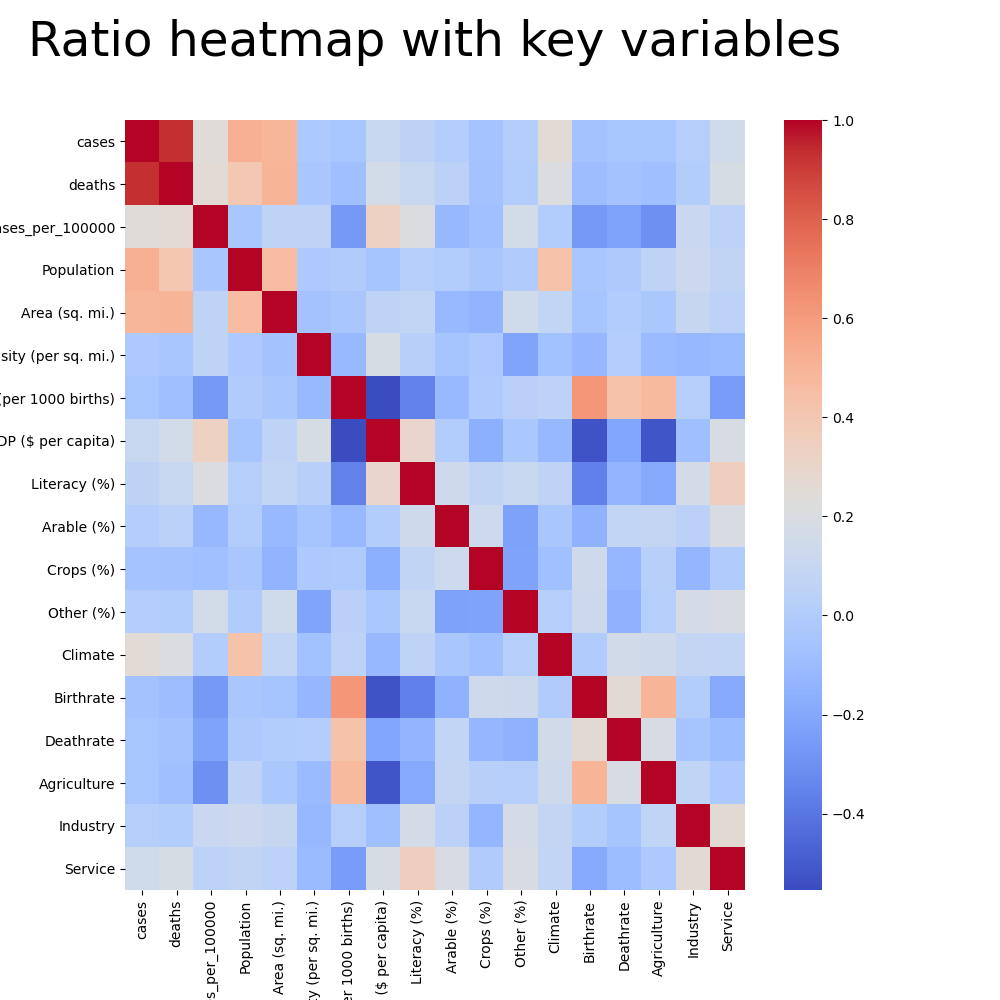

Text(0.5, 1.0, 'Ratio heatmap with key variables\n')

In [7]:
plt.figure(figsize=(10,10))
ratio_correlation = df3.corr()
sns.heatmap(ratio_correlation,cmap = 'coolwarm')
plt.title('Ratio heatmap with key variables\n',size=35)

<IPython.core.display.Javascript object>


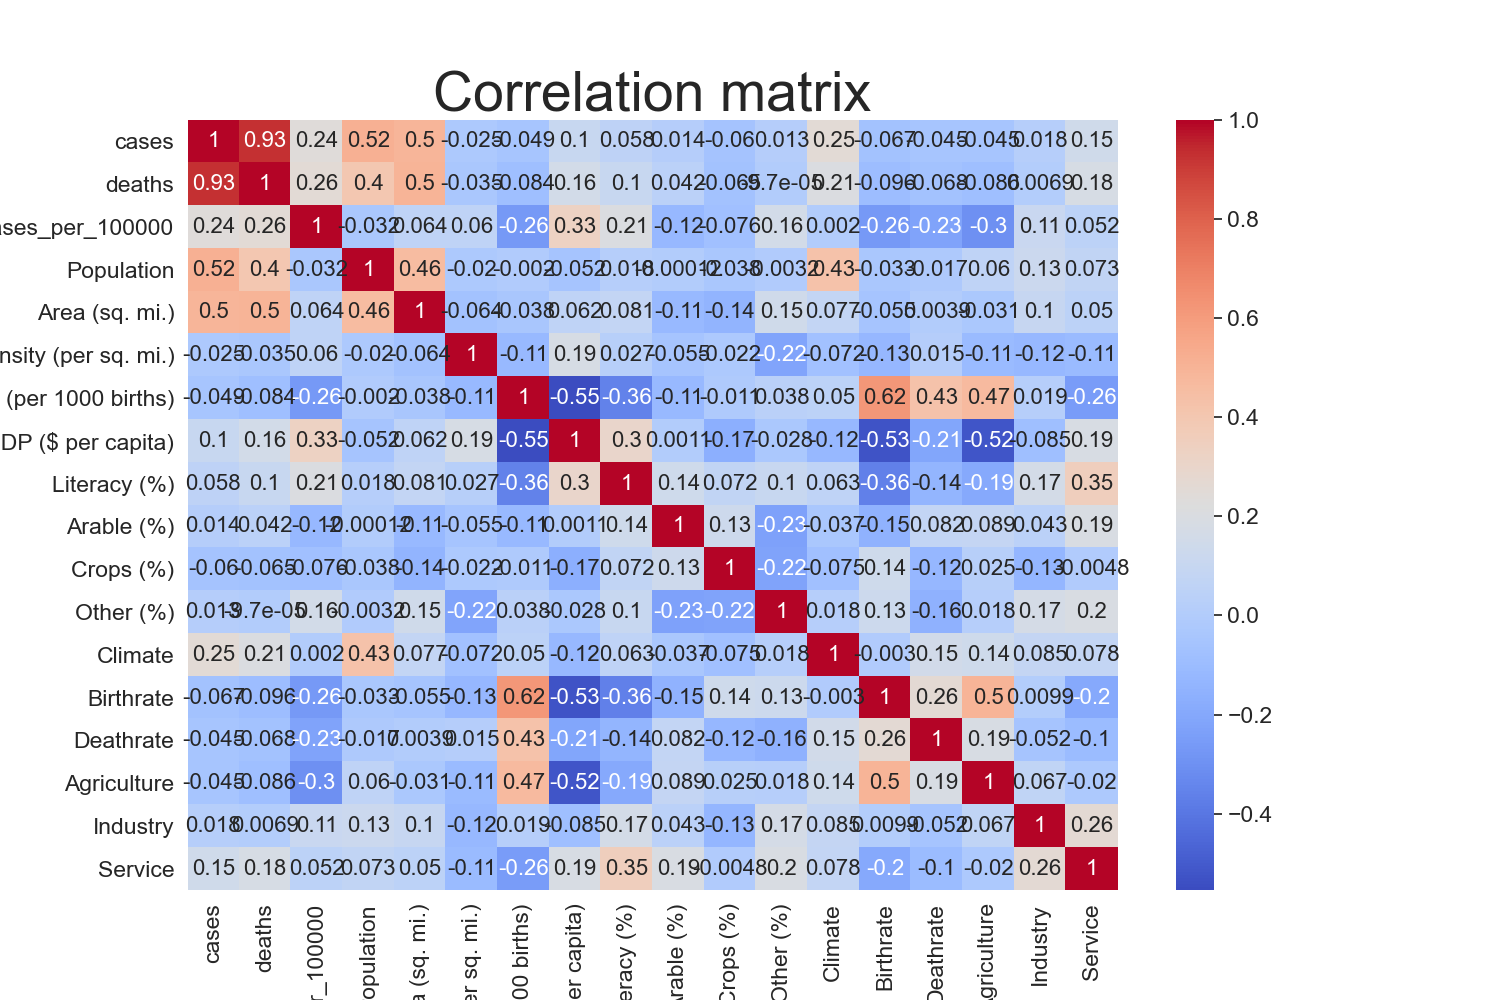

In [29]:
param = df3.columns
corr = df3[param]
plt.figure(figsize=(15, 10))
plt.title('Correlation matrix of key variables', size=40)
sns.heatmap(corr.corr(), cmap = 'coolwarm', annot = True, annot_kws = {"size":16})

<IPython.core.display.Javascript object>


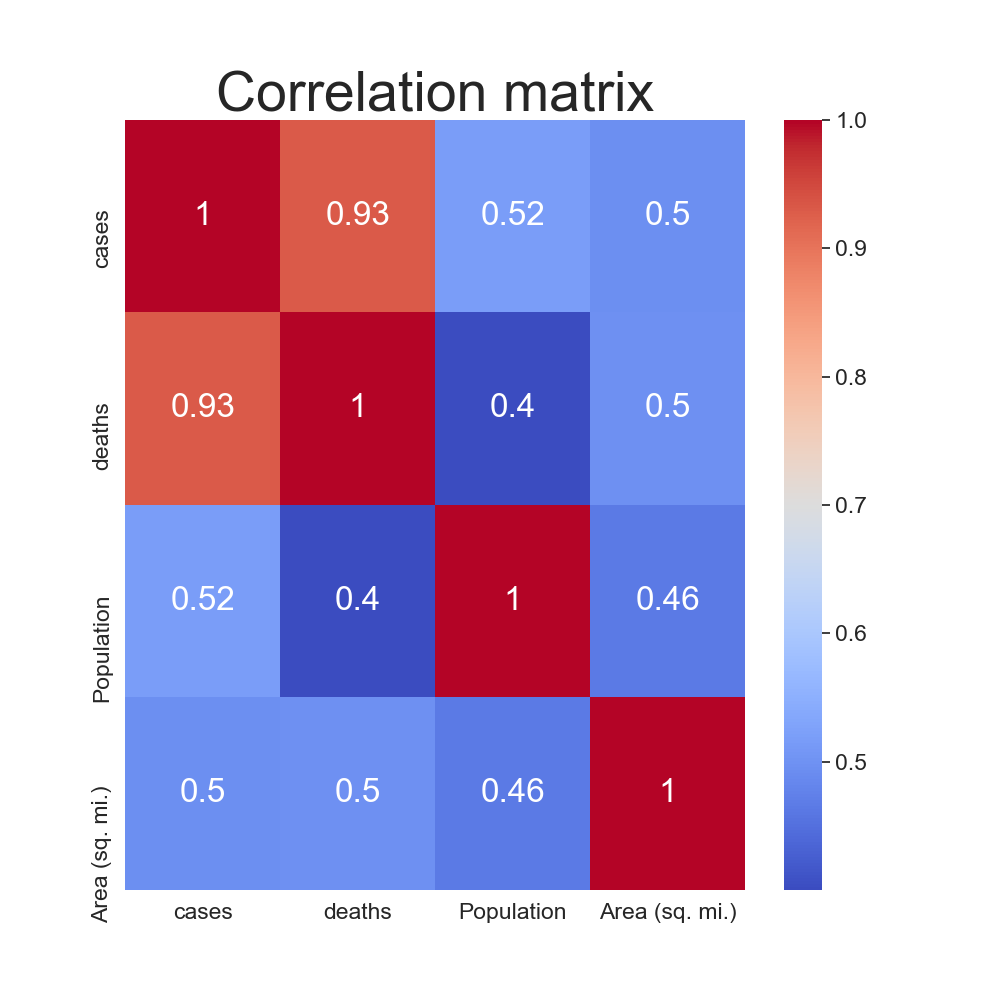

In [36]:
param = ['cases', 'deaths', 'Population', 'Area (sq. mi.)']
corr = df3[param]

plt.figure(figsize=(10, 10))
plt.title('Correlation matrix', size=40)

sns.heatmap(corr.corr(), cmap = 'coolwarm', annot = True, annot_kws = {"size":24})

<IPython.core.display.Javascript object>


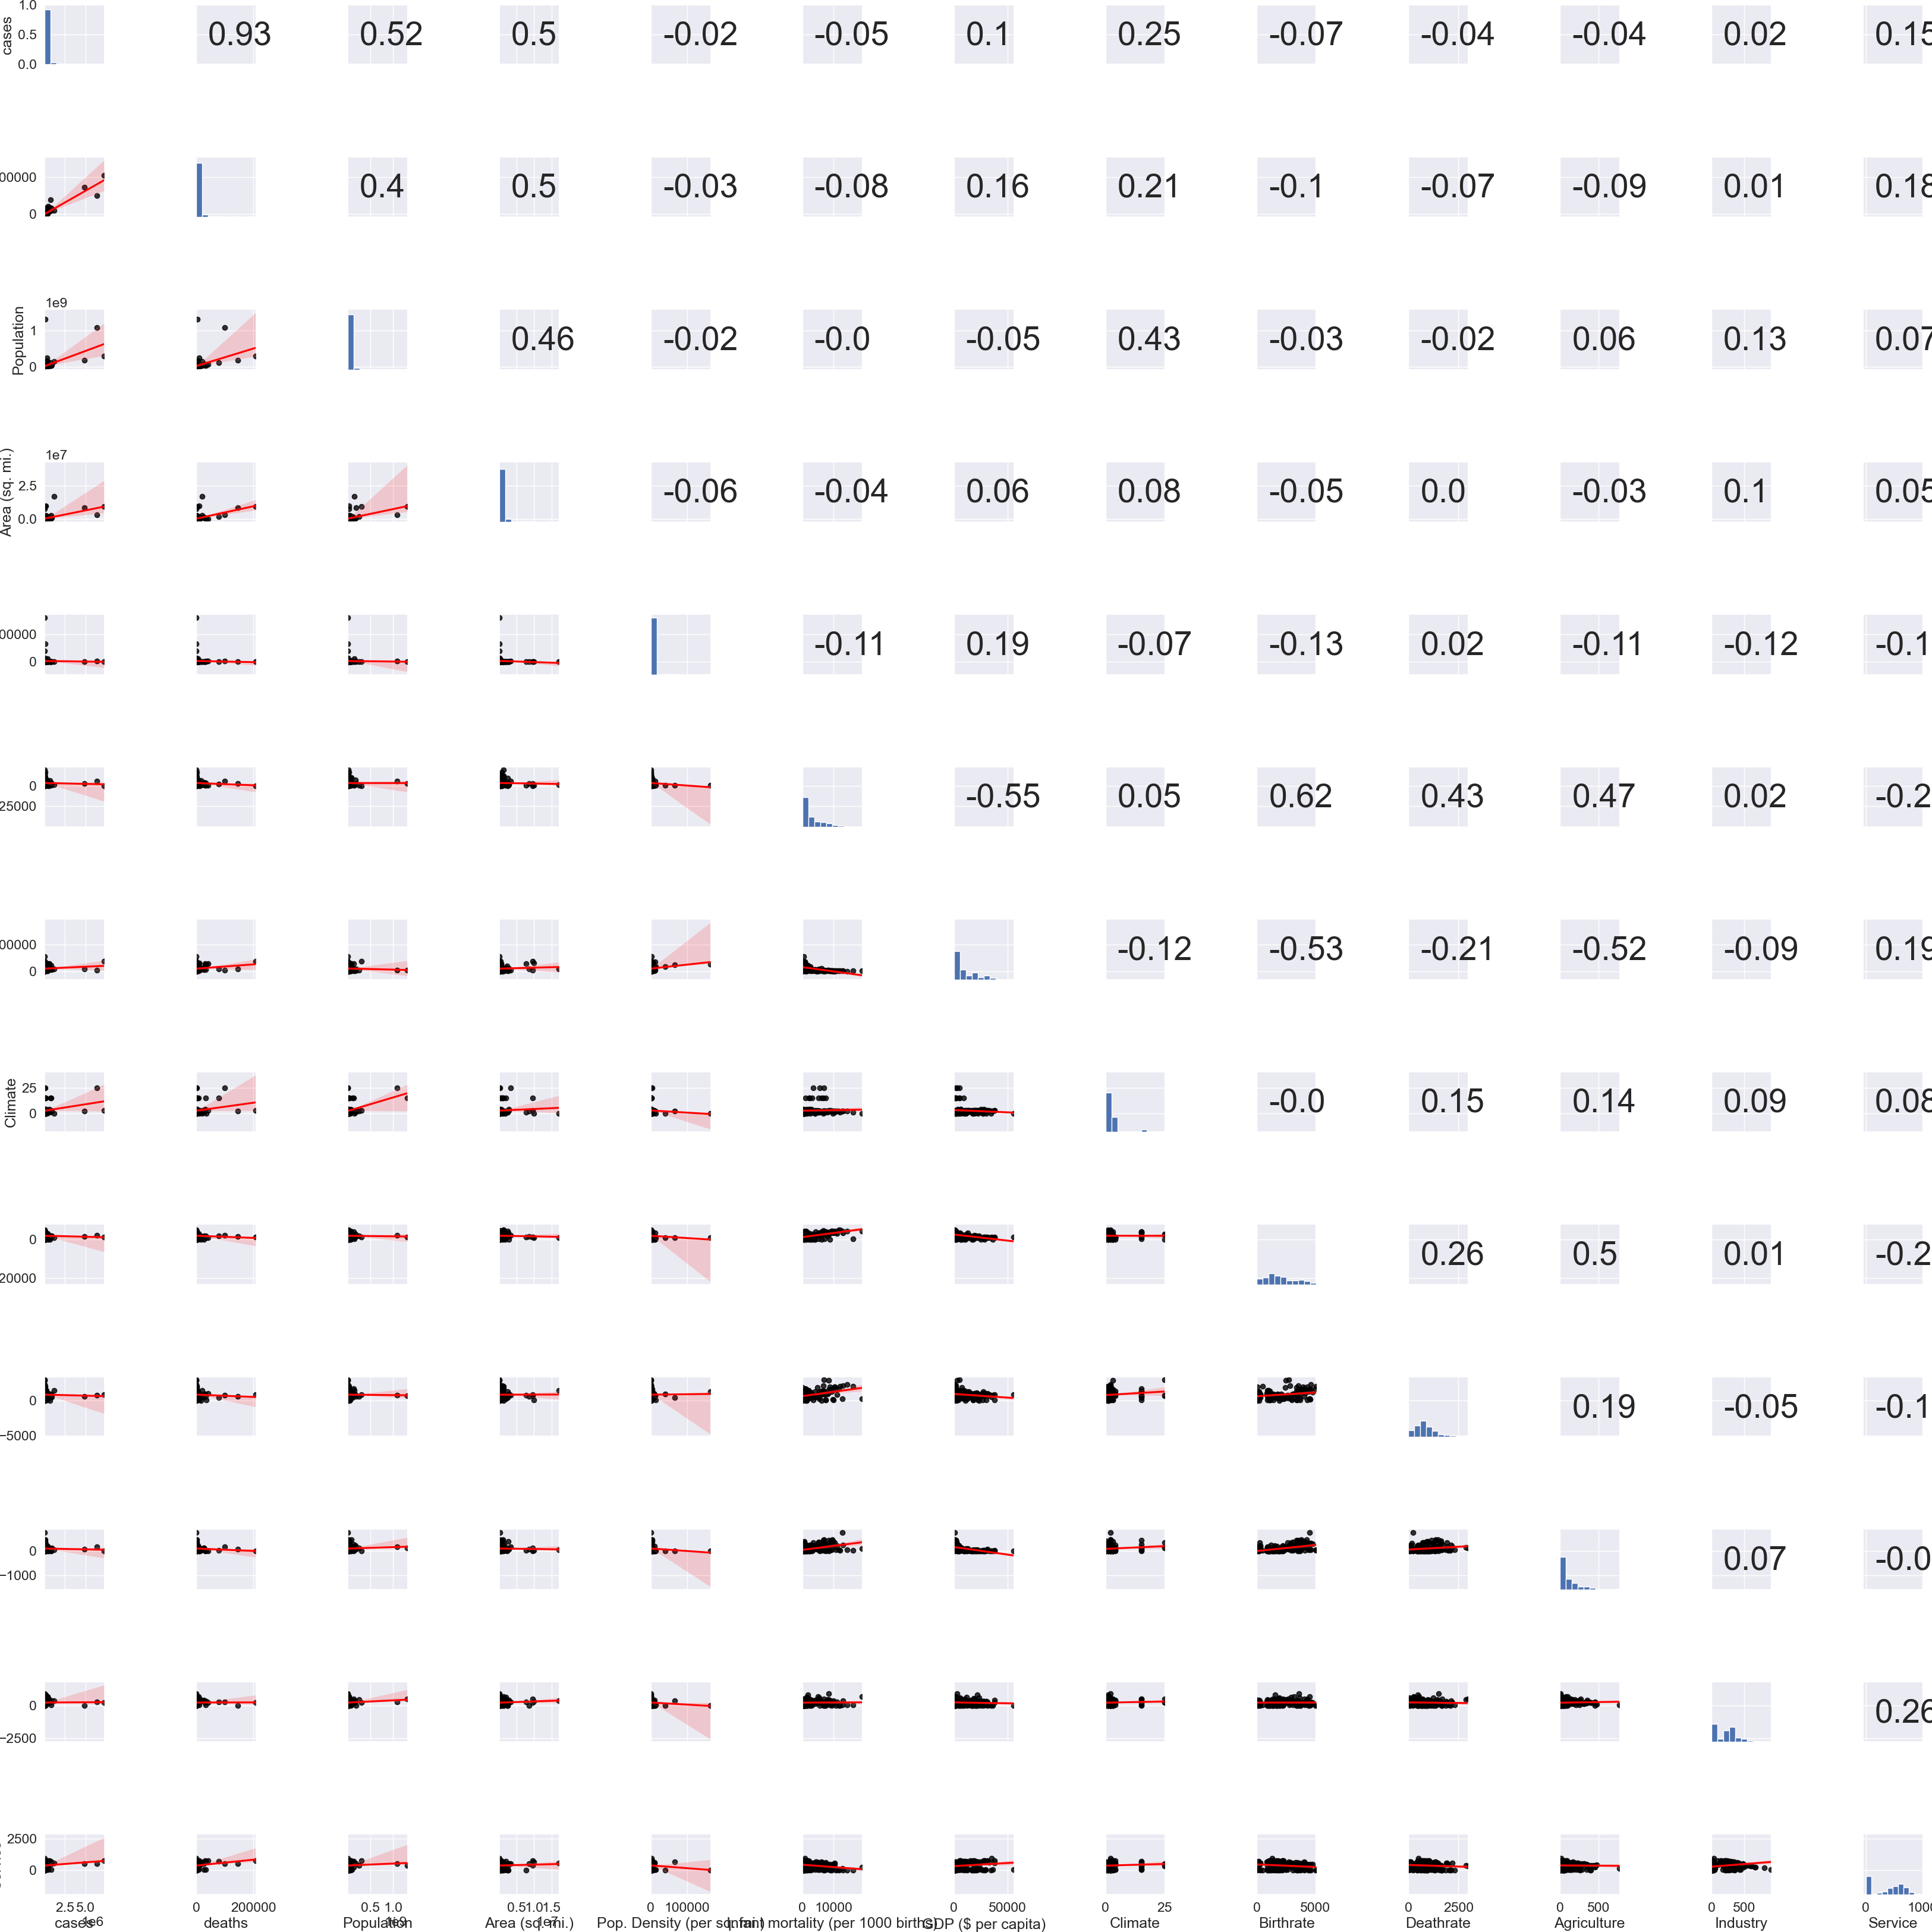

Text(0.5, 1.05, 'Pairgrid of key variables\n')

In [6]:
def corr(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    label = str(round(coef, 2))
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.33), size = 40, xycoords = ax.transAxes)
    
#params = ['cases','deaths','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'Population', 'Area','Pop. density', 'Infant mortality', 'GDP', 'Literacy', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate','Agriculture','Industry', 'service']
params = ['cases','deaths','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]

sns.set(font_scale=1.5)
g = sns.PairGrid(df3[params])
g = g.map_lower(sns.regplot,line_kws={"color": "red"}, scatter_kws={'color':'black'})
g = g.map_diag(plt.hist)
g = g.map_upper(corr)
plt.suptitle('Pairgrid of key variables\n',size='40', y=1.05)

In [7]:
params = ['cases','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]
X=df3[params]
y = df3['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [8]:
predictions = []
for i in range(1, 18):
    estimator = linear_model.LinearRegression()
    selector = RFE(estimator, i)
    selector.fit(X_train,y_train)
    predictions.append(selector.predict(X_test))

C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing 

In [11]:
mse, rmse, rsquared, mae = ([] for i in range(4))
for prediction in predictions:
    mse.append(mean_squared_error(y_test, prediction))
    rmse.append(np.sqrt(mean_squared_error(y_test, prediction)))
    rsquared.append(r2_score(y_test, prediction))
    mae.append(mean_absolute_error(y_test, prediction))
prediction_df = pd.DataFrame({'mse': mse, 'rmse': rmse, 'rsquared': rsquared, 'mae': mae})
prediction_df.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

<IPython.core.display.Javascript object>


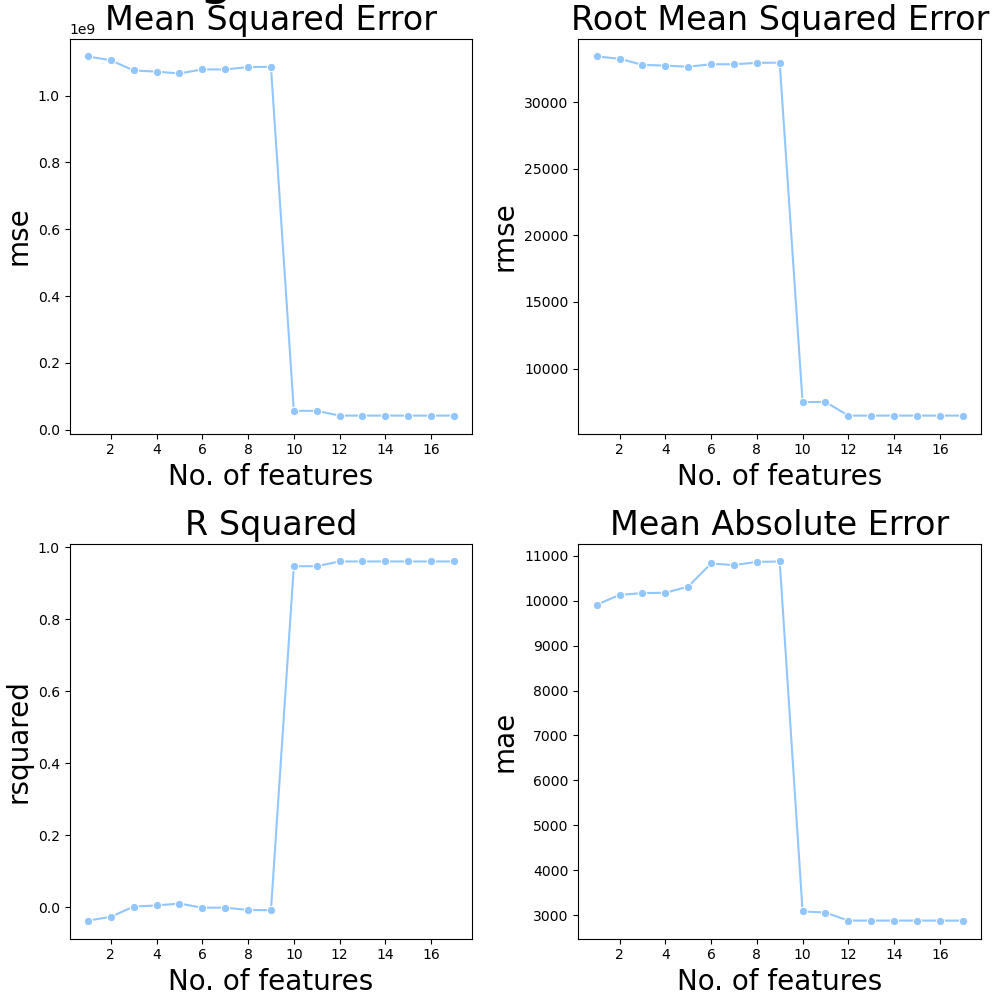

In [13]:
cols = ['mse','rmse','rsquared','mae']
titleList = ['Mean Squared Error','Root Mean Squared Error','R Squared','Mean Absolute Error']

fig,axes = plt.subplots(2, 2, sharex=False, sharey=False,figsize = (10,10),constrained_layout = True)
#plt.tight_layout()
fig.suptitle('Linear Regression Performance with RFE', size='40',y=1.05)
for i, ax in enumerate(axes.flat):
    sns.lineplot(data=prediction_df,x=prediction_df.index,y=cols[i],ax=ax,marker="o")
    ax.set_title(titleList[i],size='24')
    ax.set_xlabel('No. of features',size='20')
    ax.set_ylabel(cols[i],size='20')

In [15]:
params = ['cases','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]
X=df3[params]
y = df3['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
estimator = linear_model.LinearRegression()
selector = RFE(estimator,1)
selector.fit(X_train, y_train)
prediction = selector.predict(X_test)
feature_rankings = pd.DataFrame(
    {'features': X_train.columns,
     'ranking': selector.ranking_})
feature_rankings.sort_values(by=['ranking'])

C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


,features,ranking
6,Climate,1
9,Agriculture,2
11,Service,3
10,Industry,4
8,Deathrate,5
4,Infant mortality (per 1000 births),6
7,Birthrate,7
5,GDP ($ per capita),8
3,Pop. Density (per sq. mi.),9
0,cases,10


In [16]:
params = ['cases','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]
X=df3[params]
y = df3['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [17]:
predictions = []
for i in range(1, 18):
    estimator = LogisticRegression(solver='liblinear',multi_class='auto',random_state=42)
    selector = RFE(estimator, i)
    selector.fit(X_train,y_train)
    predictions.append(selector.predict(X_test))

C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: Converge

C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=9 as keyword args. From ve

In [18]:
accuracy, f1, recall, precision = ([] for i in range(4))
for prediction in predictions:
    accuracy.append(accuracy_score(y_test,prediction))
    f1.append(f1_score(y_test,prediction,average='macro'))
    recall.append(recall_score(y_test,prediction,average='macro'))
    precision.append(precision_score(y_test,prediction,average='macro'))
    
prediction_df = pd.DataFrame({'accuracy': accuracy,'f1': f1,'recall': recall,'precision': precision})

prediction_df.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


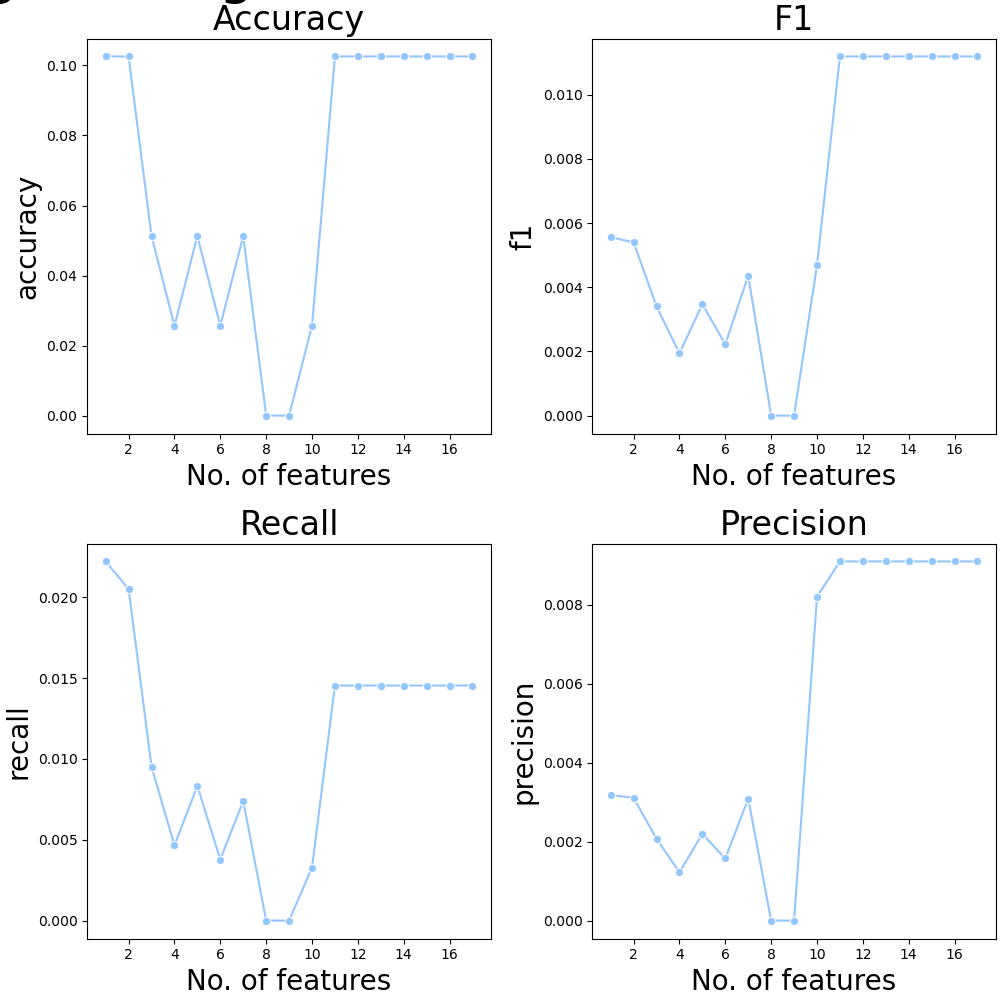

In [19]:
cols = ['accuracy','f1','recall','precision']
titleList = ['Accuracy','F1','Recall','Precision']

fig,axes = plt.subplots(2, 2, sharex=False, sharey=False,figsize = (10,10),constrained_layout = True)
#plt.tight_layout()
fig.suptitle('Logistic Regression Performance with RFE', size='40',y=1.05)
for i, ax in enumerate(axes.flat):
    sns.lineplot(data=prediction_df,x=prediction_df.index,y=cols[i],ax=ax,marker="o")
    ax.set_title(titleList[i],size='24')
    ax.set_xlabel('No. of features',size='20')
    ax.set_ylabel(cols[i],size='20')

In [20]:
estimator = LogisticRegression(multi_class='auto', solver='liblinear')
selector = RFE(estimator, 1)
selector.fit(X_train,y_train)

feature_rankings = pd.DataFrame(
    {'features': X_train.columns,
     'ranking': selector.ranking_})
feature_rankings.sort_values(by=['ranking'])

C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DOLPHIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: Converge

,features,ranking
9,Agriculture,1
10,Industry,2
3,Pop. Density (per sq. mi.),3
11,Service,4
8,Deathrate,5
7,Birthrate,6
4,Infant mortality (per 1000 births),7
5,GDP ($ per capita),8
2,Area (sq. mi.),9
0,cases,10


In [21]:
params = ['cases','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]
X=df3[params]
y = df3['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
        param_grid={
            'max_depth': [9,7,5,3, None],
            'n_estimators': (100,200,400,600,800,1000),
            'max_features': (2,4,6,10,12,15,16,17),
            'min_samples_split': [2, 5, 10]
        }, cv=10, n_jobs=-1, scoring='r2')
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
grid_search = load('files/joblibs/randomforestregressor.joblib')

In [ ]:
feature_rankings = grid_search.best_estimator_.feature_importances_
feature_rankings = pd.DataFrame(
    {'features': X_train.columns,
     'ranking': feature_rankings})
feature_rankings.sort_values(by=['ranking'],  ascending=False)